# loading data

In [1]:
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [4]:
raw_train = read_idx("./data/train-images.idx3-ubyte")
X = np.reshape(raw_train, (60000, 28*28))#train_data
y = read_idx("./data/train-labels.idx1-ubyte")#train_lebel

raw_test = read_idx("./data/t10k-images.idx3-ubyte")
test_data = np.reshape(raw_test, (10000, 28*28))
test_label = read_idx("./data/t10k-labels.idx1-ubyte")

/home/ryu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


# preprocessing

In [6]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X = mm.fit_transform(X)

In [7]:
print(X.shape)
print(y.shape)

(60000, 784)
(60000,)


# classifier

In [ ]:
data_number, data_feature = np.shape(X)
init_w=np.random.rand(data_feature, 1)

for j in range(data_number):
    pridicted=np.dot(X[j],init_w)
    condition_=y*(init_w+pridicted)
print(condition_)

In [3]:
import numpy as np

class MyClassifier(object):
    
    def __init__(self, C=0.1, iter=10):
        self.C=C
        self.iter=iter
        
    def fit(self, X, y):
        """Fit the SVM model according to the given training data."""
        data_number, data_feature = np.shape(X)
        init_w=np.random.rand(data_feature, 1)
        
        for label in range(0,9):
            for i in (0,iter):
                for j in range(data_number):
                    pridicted=np.dot(X[j],init_w)
                    if(label==y[j]):
                        y=1
                    else :
                        y=-1
                    
                    if((a==0 and y*pridicted>=1)or(a==c and y*pridicted<1)):
                        pass
                    else :
                        old_a=a
                        a=old_a+(1-y*pridicted)*(np.dot(X[j],X[j]))
                        
                        if(a<0):
                            a=0
                        if(a>C):
                            a=C
                        w=w+(a-old_a)*y*x[j]
                    
        return self
   
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def get_params(self, deep=True):
        """Get parameters for this estimator."""
        out = dict()#사전 만들기
        for key in self._get_param_names():
            value = getattr(self, key, None)#getattr - 해당되는 값을 가져온다
            if deep and hasattr(value, 'get_params'):#hasattr - value 내에 해당하는 값이 있으면 True, 없으면 False
                deep_items = value.get_params().items()
                out.update((key + '__' + k, val) for k, val in deep_items)
            out[key] = value
        return out
   
    def predict(self, X):
        """Perform classification on samples in X."""
        return np.where(np.dot(X, self.w_[1:]) + self.w_[0] >= 0.0, 1, -1)
    
    def score(self, X, y, sample_weight=None):
        """Returns the mean accuracy on the given test data and labels."""
        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
    
    def set_params(self, **parameters):
        """Set the parameters of this estimator."""
        return self

# training

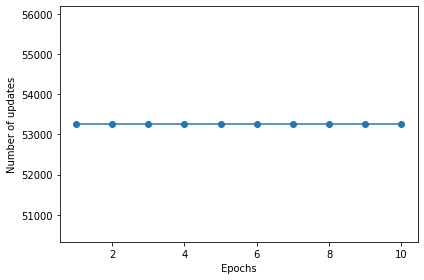

In [13]:
mine = MyClassifier(C=0.1, iter=10)

mine.fit(X, y)

plt.plot(range(1, len(mine.errors_) + 1), mine.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

# gridsearch

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score

mine = MyClassifier()

my_param={"C":[0.01, 0.1, 1], 
          }

scoring = {'f1 macro': make_scorer(f1_score , average='macro'),
           'f1 micro': make_scorer(f1_score, average = 'micro'),
           'Accuracy': make_scorer(accuracy_score)
          }

my_grid = GridSearchCV(mine, my_param, cv=10, scoring=scoring, refit=False)
my_grid.fit(train_mm, train_label)